In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
383  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
384  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
385  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
386  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
387  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

In [4]:
#빈데이터 많은 Chol, BUN 제거
psqi_df=df[['Sample_ID','GROUP','COHORT','AGE','SEX','BMI_1','PSQI_TOTAL_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1','Creatinine_1','AST_1','ALT_1','TG_1','LDL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','HDL_1',
          'BMI_2','PSQI_TOTAL_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','TG_2','LDL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','HDL_2',
           'PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2',
           'PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']]

In [5]:
psqi_df

,Sample_ID,GROUP,COHORT,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,...,PSQI_Q5e_1,PSQI_Q5f_1,PSQI_Q5g_1,PSQI_Q5h_1,PSQI_Q5i_1,PSQI_Q5j_1,PSQI_Q6_1,PSQI_Q7_1,PSQI_Q8_1,PSQI_Q9_1
0,S0001,SMI,2,60,M,21.110190,8.0,7.7,0.2,3.91,...,0.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,2.0,1.0
1,S0002,SMI,2,61,M,27.782064,4.0,5.4,0.2,5.51,...,3.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,1.0,1.0
2,S0003,SMI,2,52,F,24.944742,3.0,5.1,0.7,4.85,...,3.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,2.0,0.0
3,S0004,SMI,2,41,F,22.620489,6.0,4.2,0.6,6.14,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,1.0
4,S0005,SMI,2,41,F,20.524157,10.0,3.2,0.1,4.93,...,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,24,F,34.803410,5.0,11.3,0.4,5.32,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
384,MetS_S0281,MetS,1,44,F,30.903615,3.0,10.6,2.3,5.82,...,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
385,MetS_S0282,MetS,1,37,F,28.676533,3.0,12.2,1,6.18,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
386,MetS_S0283,MetS,1,51,M,24.549738,5.0,10.4,1.2,6.67,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [6]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
psqi_df = psqi_df[(psqi_df['COHORT'] != 3)]
psqi_df

,Sample_ID,GROUP,COHORT,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,...,PSQI_Q5e_1,PSQI_Q5f_1,PSQI_Q5g_1,PSQI_Q5h_1,PSQI_Q5i_1,PSQI_Q5j_1,PSQI_Q6_1,PSQI_Q7_1,PSQI_Q8_1,PSQI_Q9_1
0,S0001,SMI,2,60,M,21.110190,8.0,7.7,0.2,3.91,...,0.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,2.0,1.0
1,S0002,SMI,2,61,M,27.782064,4.0,5.4,0.2,5.51,...,3.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,1.0,1.0
2,S0003,SMI,2,52,F,24.944742,3.0,5.1,0.7,4.85,...,3.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,2.0,0.0
3,S0004,SMI,2,41,F,22.620489,6.0,4.2,0.6,6.14,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,1.0
4,S0005,SMI,2,41,F,20.524157,10.0,3.2,0.1,4.93,...,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,24,F,34.803410,5.0,11.3,0.4,5.32,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
384,MetS_S0281,MetS,1,44,F,30.903615,3.0,10.6,2.3,5.82,...,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
385,MetS_S0282,MetS,1,37,F,28.676533,3.0,12.2,1,6.18,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
386,MetS_S0283,MetS,1,51,M,24.549738,5.0,10.4,1.2,6.67,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [7]:
psqi_df=psqi_df.dropna()
psqi_df.reset_index(drop=True, inplace=True)
psqi_df=psqi_df.drop(["Sample_ID", "GROUP", "COHORT"],axis=1)
#1분, 매일다름, 정해진간이없음 삭제

In [8]:
psqi_df["SEX"] = psqi_df["SEX"].apply(lambda x: 1. if x=='M' else 0.)

In [9]:
psqi_df["Insulin _1"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["Insulin _2"] = psqi_df["Insulin _2"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [10]:
psqi_df["CRP_1"] = psqi_df["CRP_1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["CRP_2"] = psqi_df["CRP_2"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [11]:
psqi_df.describe()

,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,Neutrophil_1,Lym_1,GLU0_1,...,PSQI_Q5e_1,PSQI_Q5f_1,PSQI_Q5g_1,PSQI_Q5h_1,PSQI_Q5i_1,PSQI_Q5j_1,PSQI_Q6_1,PSQI_Q7_1,PSQI_Q8_1,PSQI_Q9_1
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,...,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,38.107955,0.306818,23.787859,5.062500,7.715909,0.757955,5.856227,56.110795,34.115909,98.857955,...,0.636364,0.267045,0.227273,0.397727,0.448864,0.375000,1.142045,0.136364,0.460227,0.556818
std,11.451001,0.462489,4.980203,2.844858,4.133429,1.357495,1.420172,8.566716,7.746644,14.580897,...,1.027416,0.652244,0.618335,0.725688,0.930560,0.852727,0.690544,0.559220,0.840821,0.746159
min,20.000000,0.000000,15.231576,0.000000,0.100000,0.000000,2.820000,34.500000,15.100000,63.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,20.833309,3.000000,4.975000,0.200000,4.857500,50.525000,28.975000,91.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,35.000000,0.000000,23.351473,5.000000,6.600000,0.300000,5.720000,55.950000,34.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,46.000000,1.000000,25.502662,7.000000,9.505000,0.700000,6.612500,62.025000,39.000000,102.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000
max,63.000000,1.000000,67.500000,14.000000,24.700000,11.100000,10.550000,78.400000,55.400000,182.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [12]:
psqi_df["SEX"].value_counts()

0.0    122
1.0     54
Name: SEX, dtype: int64

In [13]:
psqi_df

,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,Neutrophil_1,Lym_1,GLU0_1,...,PSQI_Q5e_1,PSQI_Q5f_1,PSQI_Q5g_1,PSQI_Q5h_1,PSQI_Q5i_1,PSQI_Q5j_1,PSQI_Q6_1,PSQI_Q7_1,PSQI_Q8_1,PSQI_Q9_1
0,35,1.0,24.097789,5.0,5.57,0.0,5.82,54.6,35.0,89,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,46,1.0,23.472213,5.0,7.35,0.7,5.46,44.3,43.7,90,...,3.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2,32,1.0,23.744827,2.0,9.26,0.4,3.99,51.0,37.8,96,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,33,0.0,20.616175,4.0,3.52,0.0,5.84,39.1,42.1,81,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4,28,0.0,18.437500,3.0,2.86,0.0,4.22,49.3,39.3,63,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,63,0.0,26.259585,3.0,4.20,0.2,4.78,42.3,47.3,96,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,57,1.0,28.630719,4.0,8.80,3.0,4.60,51.7,34.6,94,...,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,1.0,3.0
173,35,0.0,21.641274,1.0,6.30,0.4,6.34,55.9,34.9,87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,61,0.0,20.421366,8.0,4.80,0.2,4.88,40.9,48.0,93,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0


In [56]:
#x 배열 생성 (x=쓸 수 있는 모든 특징)
X1=psqi_df[['AGE','SEX','BMI_1','PSQI_TOTAL_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1',
            'Creatinine_1','AST_1','ALT_1','HDL_1','LDL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1',
            'PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1',
            'PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values

X2=psqi_df[['AGE','SEX','BMI_2','PSQI_TOTAL_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','HDL_2','LDL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2',
            'PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2',
            'PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values
X=np.concatenate((X1, X2), axis=0)


#y 배열 생성 (y=TG)
Y1= psqi_df[['TG_1']].values
Y2= psqi_df[['TG_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

In [57]:
len(X), len(Y)

(352, 352)

In [58]:
X.shape, Y.shape

((352, 48), (352, 1))

# 정규화

In [59]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [60]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [61]:
len(x_train), len(x_test)

(281, 71)

In [62]:
X.shape, Y.shape

((352, 48), (352, 1))

In [63]:
dim=X.shape[1]
dim

48

# MLP

In [64]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=1000, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/1000
71/71 - 2s - loss: 17287.6191 - mse: 17287.6191
Epoch 2/1000
71/71 - 0s - loss: 16238.3467 - mse: 16238.3467
Epoch 3/1000
71/71 - 0s - loss: 14418.6631 - mse: 14418.6631
Epoch 4/1000
71/71 - 0s - loss: 11827.5879 - mse: 11827.5879
Epoch 5/1000
71/71 - 0s - loss: 8984.8516 - mse: 8984.8516
Epoch 6/1000
71/71 - 0s - loss: 6693.9683 - mse: 6693.9683
Epoch 7/1000
71/71 - 0s - loss: 5754.4370 - mse: 5754.4370
Epoch 8/1000
71/71 - 0s - loss: 5342.5942 - mse: 5342.5942
Epoch 9/1000
71/71 - 0s - loss: 5149.2544 - mse: 5149.2544
Epoch 10/1000
71/71 - 0s - loss: 5006.9702 - mse: 5006.9702
Epoch 11/1000
71/71 - 0s - loss: 4922.2852 - mse: 4922.2852
Epoch 12/1000
71/71 - 0s - loss: 4831.1626 - mse: 4831.1626
Epoch 13/1000
71/71 - 0s - loss: 4717.6455 - mse: 4717.6455
Epoch 14/1000
71/71 - 0s - loss: 4623.2427 - mse: 4623.2427
Epoch 15/1000
71/71 - 0s - loss: 4591.7383 - mse: 4591.7383
Epoch 16/1000
71/71 - 0s - loss: 4478.5361 - mse: 4478.5361
Epoch 17/1000
71/71 - 0s - loss: 4475.592

[5243.78564453125, 5243.78564453125]

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                1568      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 2,657
Trainable params: 2,657
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

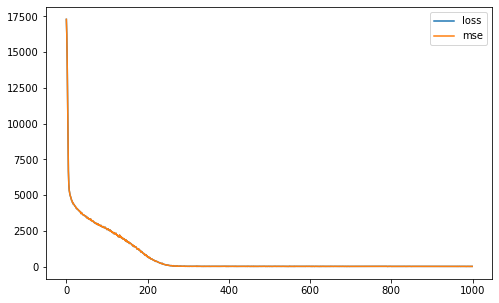

In [66]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [67]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

In [68]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [69]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 9.61 %
test set prediction accuracy: 14.08 %


In [70]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()

### <오차범위 3>
- train set prediction accuracy(+-3): 84.70 % <br>
- test set prediction accuracy(+-3): 7.04 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 95.73 % <br>
- test set prediction accuracy(+-5): 11.27 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 98.93 % <br>
- test set prediction accuracy(+-10): 16.90 % <br>
<br>



In [71]:
#x 배열 생성 (시본으로 선별한 특징)
X1=psqi_df[['SEX','AGE','PSQI_TOTAL_1','BMI_1','WBC_1','Insulin _1','Neutrophil_1','HDL_1','GLU0_1',
            'Muscle_1','FatPercentage _1','SBP_1','DBP_1','HR_1','Waist_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1',
            'PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1',
            'PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values

X2=psqi_df[['SEX','AGE','PSQI_TOTAL_2','BMI_2','WBC_2','Insulin _2','Neutrophil_2','HDL_2','GLU0_2',
            'Muscle_2','FatPercentage_2','SBP_2','DBP_2','HR_2','Waist_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2',
            'PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2',
            'PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values

X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=TG)
Y1= psqi_df[['TG_1']].values
Y2= psqi_df[['TG_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

# 정규화

In [72]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [73]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [74]:
len(x_train), len(x_test)

(281, 71)

In [75]:
X.shape, Y.shape

((352, 40), (352, 1))

In [76]:
dim=X.shape[1]
dim

40

# MLP

In [77]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=1000, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/1000
71/71 - 1s - loss: 16795.3301 - mse: 16795.3301
Epoch 2/1000
71/71 - 0s - loss: 15214.1729 - mse: 15214.1729
Epoch 3/1000
71/71 - 0s - loss: 12473.6445 - mse: 12473.6445
Epoch 4/1000
71/71 - 0s - loss: 9336.7744 - mse: 9336.7744
Epoch 5/1000
71/71 - 0s - loss: 6981.9521 - mse: 6981.9521
Epoch 6/1000
71/71 - 0s - loss: 5767.1631 - mse: 5767.1631
Epoch 7/1000
71/71 - 0s - loss: 5404.5537 - mse: 5404.5537
Epoch 8/1000
71/71 - 0s - loss: 5204.9243 - mse: 5204.9243
Epoch 9/1000
71/71 - 0s - loss: 5039.3892 - mse: 5039.3892
Epoch 10/1000
71/71 - 0s - loss: 4979.4058 - mse: 4979.4058
Epoch 11/1000
71/71 - 0s - loss: 4823.2710 - mse: 4823.2710
Epoch 12/1000
71/71 - 0s - loss: 4768.9814 - mse: 4768.9814
Epoch 13/1000
71/71 - 0s - loss: 4700.5913 - mse: 4700.5913
Epoch 14/1000
71/71 - 0s - loss: 4631.8193 - mse: 4631.8193
Epoch 15/1000
71/71 - 0s - loss: 4565.9028 - mse: 4565.9028
Epoch 16/1000
71/71 - 0s - loss: 4508.3638 - mse: 4508.3638
Epoch 17/1000
71/71 - 0s - loss: 4488.9365 

[4552.3935546875, 4552.3935546875]

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                1312      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

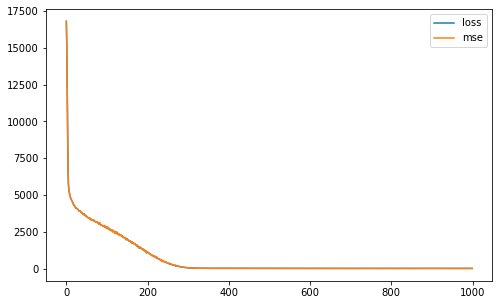

In [79]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [80]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

In [81]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [82]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 9.61 %
test set prediction accuracy: 14.08 %


In [83]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 20 설정
print('### <오차범위 20>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도

### <오차범위 3>
- train set prediction accuracy(+-3): 76.87 % <br>
- test set prediction accuracy(+-3): 1.41 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 90.39 % <br>
- test set prediction accuracy(+-5): 4.23 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 98.93 % <br>
- test set prediction accuracy(+-10): 15.49 % <br>
<br>

### <오차범위 20>
- train set prediction accuracy(+-20): 100.00 % <br>
- test set prediction accuracy(+-20): 32.39 % <br>


In [43]:
#x 배열 생성 (피검사 안하고 할 수 있는 수치)
X1=psqi_df[['SEX','AGE','PSQI_TOTAL_1','BMI_1',
            'Muscle_1','FatPercentage _1','SBP_1','DBP_1','HR_1','Waist_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1',
            'PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1',
            'PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values

X2=psqi_df[['SEX','AGE','PSQI_TOTAL_2','BMI_2',
            'Muscle_2','FatPercentage_2','SBP_2','DBP_2','HR_2','Waist_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2',
            'PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2',
            'PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values
X=np.concatenate((X1, X2), axis=0)


#y 배열 생성 (y=TG)
Y1= psqi_df[['TG_1']].values
Y2= psqi_df[['TG_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

# 정규화

In [44]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [45]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [46]:
len(x_train), len(x_test)

(281, 71)

In [47]:
X.shape, Y.shape

((352, 35), (352, 1))

In [48]:
dim=X.shape[1]
dim

35

# MLP

In [49]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
71/71 - 1s - loss: 16887.9688 - mse: 16887.9688
Epoch 2/150
71/71 - 0s - loss: 15615.2969 - mse: 15615.2969
Epoch 3/150
71/71 - 0s - loss: 13472.0488 - mse: 13472.0488
Epoch 4/150
71/71 - 0s - loss: 10580.5459 - mse: 10580.5459
Epoch 5/150
71/71 - 0s - loss: 7755.1123 - mse: 7755.1123
Epoch 6/150
71/71 - 0s - loss: 6166.0776 - mse: 6166.0776
Epoch 7/150
71/71 - 0s - loss: 5517.6489 - mse: 5517.6489
Epoch 8/150
71/71 - 0s - loss: 5307.5483 - mse: 5307.5483
Epoch 9/150
71/71 - 0s - loss: 5195.6997 - mse: 5195.6997
Epoch 10/150
71/71 - 0s - loss: 5070.4697 - mse: 5070.4697
Epoch 11/150
71/71 - 0s - loss: 5035.1606 - mse: 5035.1606
Epoch 12/150
71/71 - 0s - loss: 4945.2720 - mse: 4945.2720
Epoch 13/150
71/71 - 0s - loss: 4859.1250 - mse: 4859.1250
Epoch 14/150
71/71 - 0s - loss: 4800.0547 - mse: 4800.0547
Epoch 15/150
71/71 - 0s - loss: 4769.6714 - mse: 4769.6714
Epoch 16/150
71/71 - 0s - loss: 4693.2476 - mse: 4693.2476
Epoch 17/150
71/71 - 0s - loss: 4661.8848 - mse: 4661.884

[3112.249267578125, 3112.249267578125]

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                1152      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

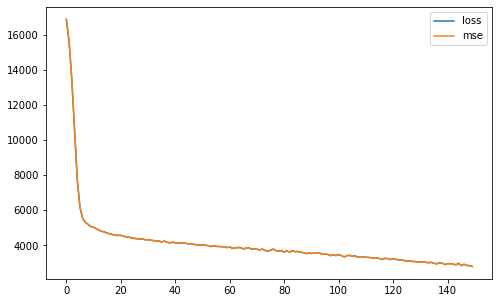

In [51]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [52]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

In [53]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [54]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 9.61 %
test set prediction accuracy: 14.08 %


In [55]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 20 설정
print('### <오차범위 20>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도

### <오차범위 3>
- train set prediction accuracy(+-3): 14.95 % <br>
- test set prediction accuracy(+-3): 8.45 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 21.71 % <br>
- test set prediction accuracy(+-5): 11.27 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 42.70 % <br>
- test set prediction accuracy(+-10): 18.31 % <br>
<br>

### <오차범위 20>
- train set prediction accuracy(+-20): 68.33 % <br>
- test set prediction accuracy(+-20): 40.85 % <br>


# 다쓴거
### <오차범위 3>
- train_all set prediction accuracy(+-3): 88.89 % <br>
- test_all set prediction accuracy(+-3): 31.94 % <br>
<br>

### <오차범위 5>
- train_all set prediction accuracy(+-5): 96.53 % <br>
- test_all set prediction accuracy(+-5): 55.56 % <br>
<br>

### <오차범위 10>
- train_all set prediction accuracy(+-10): 100.00 % <br>
- test_all set prediction accuracy(+-10): 83.33 % <br>
<br>

# 다안쓴거
### <오차범위 3>
- train_some set prediction accuracy(+-3): 32.99 % <br>
- test_some set prediction accuracy(+-3): 27.78 % <br>
<br>

### <오차범위 5>
- train_some set prediction accuracy(+-5): 54.86 % <br>
- test_some set prediction accuracy(+-5): 40.28 % <br>
<br>

### <오차범위 10>
- train_some set prediction accuracy(+-10): 82.29 % <br>
- test_some set prediction accuracy(+-10): 59.72 % <br>
<br>